In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = ("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/sentiment_labelled_sentences/yelp_labelled.txt")

In [3]:
yelp_raw = pd.read_table(data_path, header=None)

In [4]:
yelp_raw.columns = ['Review','Rating']

In [5]:
yelp_raw['Rating'] = yelp_raw['Rating'].astype('bool')

In [54]:
#remove punctuations to get text at the end of sentences
yelp_raw["Review"] = yelp_raw['Review'].str.replace('[^\w\s]','')

In [75]:
#remove capitalization of text to get text at the beginning of sentences - allcaps seems to go both ways
#for positive and negative reviews.
yelp_raw['Review'] = yelp_raw['Review'].str.lower()

In [92]:
keywords = ['bad', 'terrible', 'slow', 'cash', 'poor','worst','didnt',
                'wouldnt','shouldnt','rude','dont','rather','not','angry',
                'damn','struggle','stupid','wasnt','never','rude','waited','nothing','last',
                'unhealthy','suck','waste','sucked','hasnt','disappointed','horrible',
               'disappointment','hardly','refused','overpriced','overcooked','slow']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    yelp_raw[str(key)] = yelp_raw.Review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [77]:
yelp_raw.head(10)

,Review,Rating,bad,terrible,slow,cash,poor,worst,rather,not,...,didnt,wouldnt,shouldnt,rude,dont,wasnt,nothing,last,unhealthy,suck
0,wow loved this place,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,crust is not good,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,not tasty and the texture was just nasty,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,stopped by during the late may bank holiday of...,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,the selection on the menu was great and so wer...,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,now i am getting angry and i want my damn pho,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,honeslty it didnt taste that fresh,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
7,the potatoes were like rubber and you could te...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,the fries were great too,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,a great touch,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [88]:
yelp_raw = yelp_raw.drop(['nightmare'], axis=1)

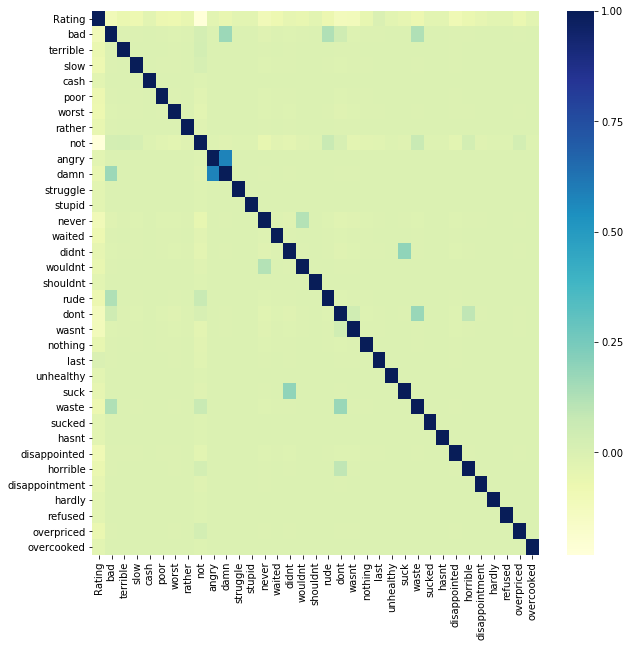

In [93]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(yelp_raw.corr(),cmap="YlGnBu")

In [94]:
data = yelp_raw[keywords]
target = yelp_raw['Rating']
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 306


In [95]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.64
Testing on Sample: 0.694


In [96]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.71, 0.69, 0.75, 0.62, 0.68, 0.66, 0.68, 0.69, 0.65, 0.67])

1) Do any of your classifiers seem to overfit?
- A little bit. There are some classifying data that definitely weaken the model - for example "not" might most likely indicate a negative response but if you have "not bad", the model will predict that as a negative review. Text reviews are interesting because there's only so much certain words can convey, especially when you get to words that have double meanings like "not". But I wouldn't say either that the model picks up random noise - some words are clearly postiive or negative. The model simply searches for keywords so I don't think it's intrinsically complex - but there might be complexity of the words and insinuations themselves.

2) Which seem to perform the best? Why?
- Constantly adding more words to the review algorithm improved the model tremendously. But I also created additional filters to the Review column such as removing apostraphes/punctuations (i.e. so that "terrible" can be picked up just as "terrible.") and not putting all the reviews to lowercase (i.e. so that "Terrible" can be picked up just as "terrible"). Creating features also such as text features to remove all cap reviews (i.e. "SO TERRIBLE" vs. "so terrible" is the same thing essentially - I'm just looking for specific texts) helped improve the model because I just wanted to focus on the text reviews rather than the tone behind reviews persay.

3) Which features seemed to be most impactful to performance?
- Removing/adjusting text features helped improve performance because it leveled the fields of the Review column. It coerced the model to look at just the text itself, without anything else, so it improved the algorithm a bit. Another adjustment was simply adding new words. Adding one more word as a text feature improved the model just a little bit so the more words I added, the more the model improved.